# Intensity level slicing

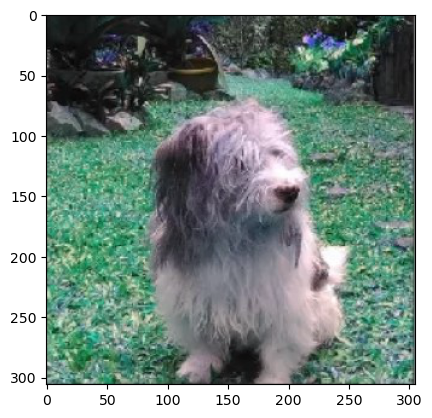

In [2]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 

# Load the image
#img = cv2.imread('graylevel6.jpg')
img = cv2.imread('dog.jpg')
# get height and width of the image 
height, width, _= img.shape 

img1 = img.copy() 

 
#original image
plt.imshow(img) 
plt.show()

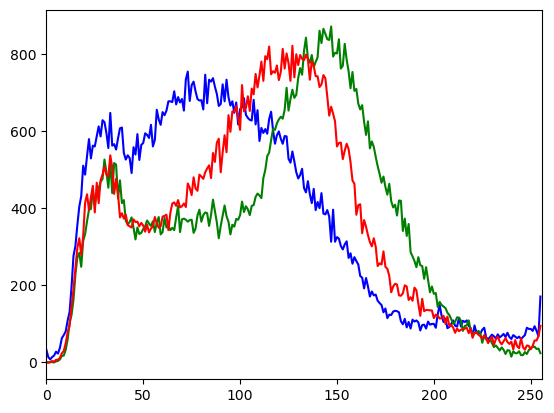

In [3]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([img],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show() 

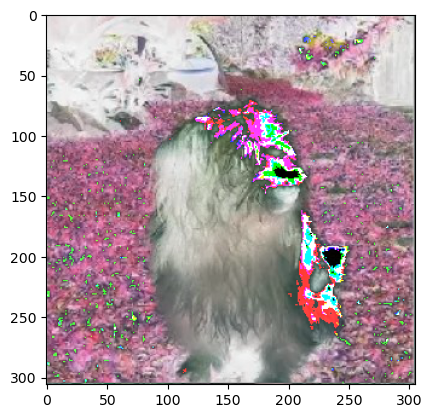

In [4]:
# get height and width of the image 
height, width, _ = img.shape 
min_range = 10
max_range =50
img1 = img.copy() 

for i in range(0, height - 1): 
    for j in range(0, width - 1): 
          
        # Get the pixel value 
        pixel = img1[i, j] 
        
        # slice each channel by  
        # subtracting it from 255 
          
        # 1st index contains red pixel 
        pixel[0] = 255 - pixel[0] 
        if pixel[0] >min_range and pixel[0] < max_range:
            pixel[0] = 255
        else:
            pixel[0] = pixel[0]

          
        # 2nd index contains green pixel 
        pixel[1] = 255 - pixel[1] 
        if pixel[1] >min_range and pixel[1] < max_range:
            pixel[1] = 255
        else:
            pixel[1] = pixel[1] 
          
        # 3rd index contains blue pixel 
        pixel[2] = 255 - pixel[2] 
        if pixel[2] > min_range and pixel[2] < max_range:
            pixel[2] = 255
        else:
            pixel[2] = pixel[2] 
          
        # Store new values in the pixel 
        img1[i, j] = pixel 
#sliced image
plt.imshow(img1) 
plt.show()

# Bit Plane slicing

In [5]:
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
img = cv2.imread('dog.jpg', 0)
lst = []
print(img.shape[0],img.shape[1])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
print(len(lst))
print(lst)
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

# Vertically concatenate
final = cv2.hconcat([finalr,finalv])

306 305
93330
['00010001', '00100011', '00100011', '00100010', '00101000', '00101010', '00101000', '00100010', '00100000', '00100000', '00011111', '00011110', '00011101', '00011101', '00011101', '00011101', '00011100', '00011011', '00011010', '00011001', '00011001', '00011010', '00011010', '00011001', '00011010', '00011001', '00011001', '00011000', '00010111', '00010111', '00010110', '00010110', '00010110', '00010111', '00010111', '00010111', '00011010', '00011110', '00100010', '00100011', '00100011', '00011110', '00100100', '00011110', '00011001', '00011110', '00100000', '00101000', '00100111', '00101001', '00101011', '00101101', '00101111', '00110001', '00110010', '00110010', '00110001', '00101010', '00100110', '00100111', '00101000', '00100111', '00100111', '00101001', '00100110', '00100110', '00100011', '00011101', '00011000', '00011000', '00011000', '00011000', '00011101', '00011100', '00011011', '00011111', '00100100', '00101000', '00101101', '00110010', '00101110', '00110001', '

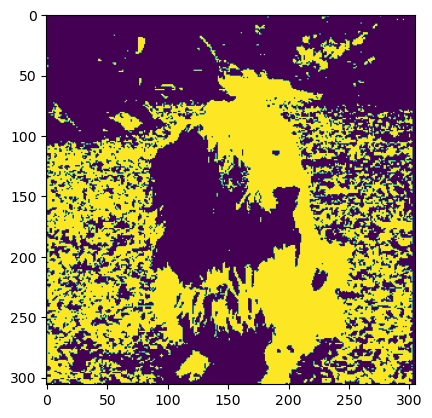

In [6]:
# Display the images
plt.imshow(eight_bit_img) 
plt.show()

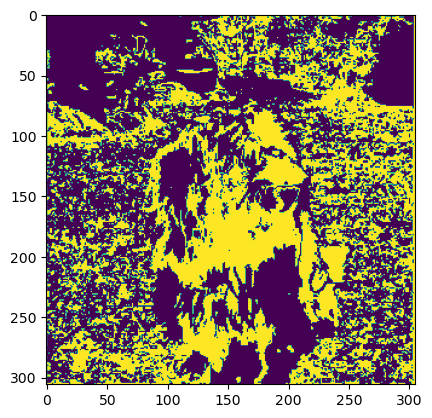

In [58]:
# Display the images
plt.imshow(seven_bit_img) 
plt.show()

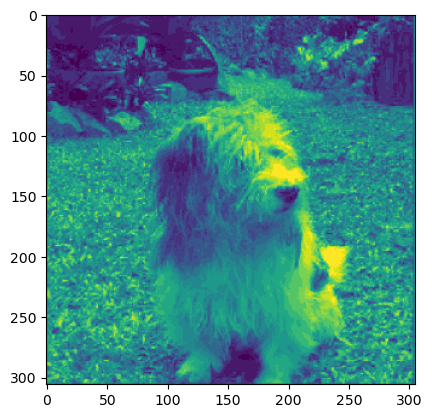

In [59]:
# Combining 4 bit planes
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
# Display the images
plt.imshow(new_img) 
plt.show()